## Buisness Goal

Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Import libraries and data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Importing Housing.csv
housing = pd.read_csv('housing-case-study-dataset.csv')

In [4]:
# Check Behavior of the table
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check the dimension of the data
housing.shape

(1460, 81)

In [6]:
# As per the number of columns available EDA for all the columns is not possible.
#Preparing data for RFE to minimize the features so that overfitting can be removed

### Analyzing the null value available in the table

In [7]:
# get columns where columns have null values in percent
percent_missing = round(housing.isnull().sum() * 100 / len(housing)).sort_values(ascending=False)
print(percent_missing[percent_missing !=0])

PoolQC          100.0
MiscFeature      96.0
Alley            94.0
Fence            81.0
FireplaceQu      47.0
LotFrontage      18.0
GarageType        6.0
GarageCond        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
BsmtFinType1      3.0
BsmtExposure      3.0
BsmtCond          3.0
BsmtQual          3.0
BsmtFinType2      3.0
MasVnrArea        1.0
MasVnrType        1.0
dtype: float64


In [8]:
# drop the column have high null value
housing = housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage' ], axis=1)

In [9]:
# get columns where columns have null values in percent
percent_missing = housing.isnull().sum() * 100 / len(housing)
print(percent_missing[percent_missing !=0].sort_values(ascending=False))

GarageCond      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageYrBlt     5.547945
GarageType      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64


### Drop Housing Rows and null columns

In [10]:
# Drop unnecessary columns
housing = housing.drop(['Id', 'Street','Utilities'],axis='columns')

In [11]:
# drop the rows have NAN value
housing = housing.dropna()

### Exploratory Data Analysis

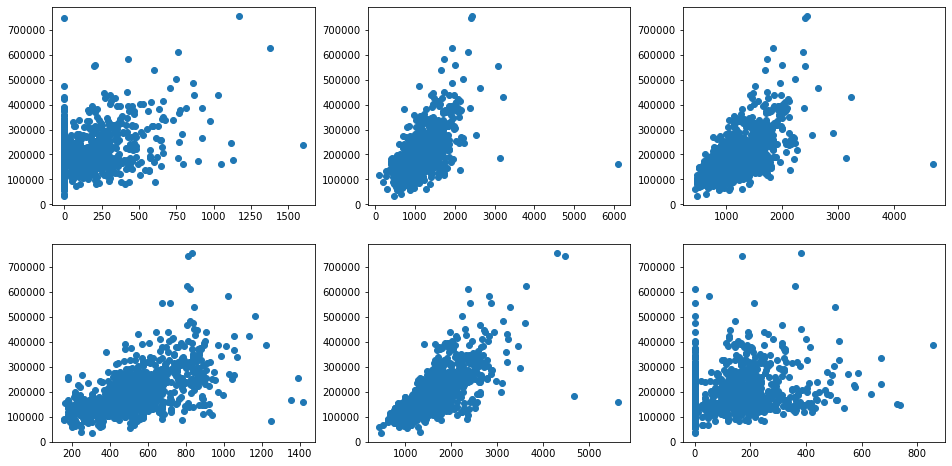

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housing.MasVnrArea,housing.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housing.TotalBsmtSF,housing.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing['1stFlrSF'],housing.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing['GarageArea'],housing.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing['GrLivArea'],housing.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing['WoodDeckSF'],housing.SalePrice)

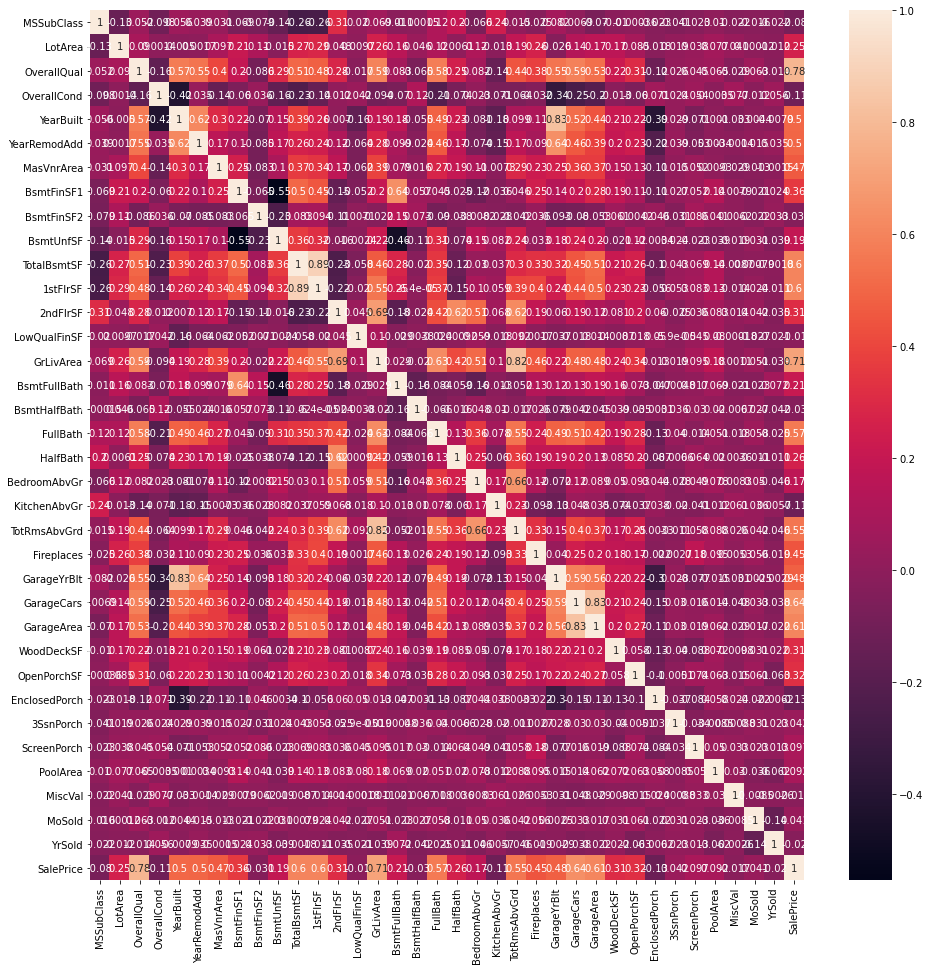

In [13]:
# Check correlation
plt.figure(figsize=(16,16))
sns.heatmap(housing[list(housing.dtypes[housing.dtypes!='object'].index)].corr(),annot=True)
plt.show()

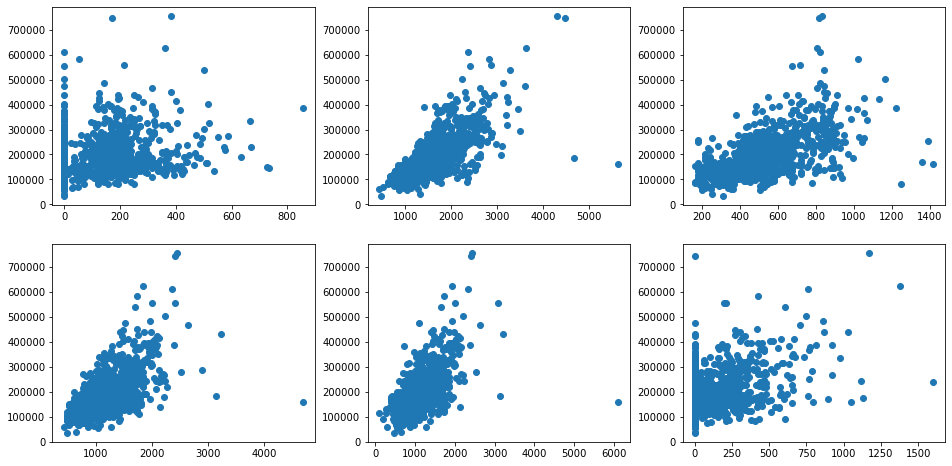

In [14]:
# Check the behavior of various variable against SalePrice
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housing['WoodDeckSF'],housing.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housing['GrLivArea'],housing.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing['GarageArea'],housing.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing['1stFlrSF'],housing.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing['TotalBsmtSF'],housing.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing['MasVnrArea'],housing.SalePrice)

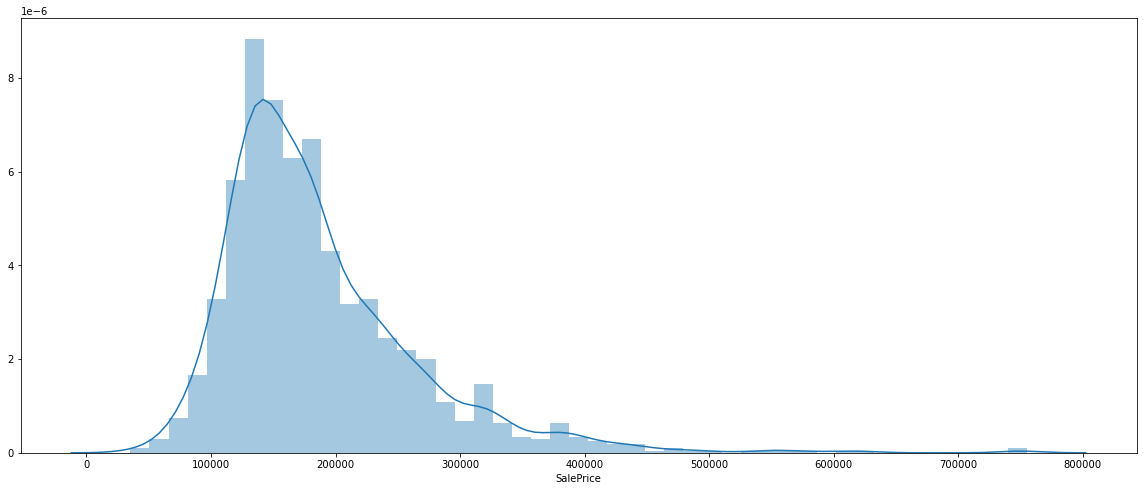

In [15]:
# Behavior of Sale Price of the house
plt.figure(figsize=(20,8))
sns.distplot(housing.SalePrice)
plt.show()

In [16]:
# getting all the columns which are not object meaning does contain number or float. So we we can remove the outliers from all of them
num_vars = housing.columns[housing.dtypes != object].tolist()
num_vars.remove('SalePrice')

In [17]:
# listed out all the classification parameters
classification_variables = housing.columns[housing.dtypes == object].tolist()
housing[classification_variables].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### Create Dummy Variables

In [18]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(housing[classification_variables], drop_first = True, prefix=classification_variables)

# Add the results to the original housing dataframe
housing =  pd.concat([housing, status], axis = 1)
    
housing = housing.drop(classification_variables,axis='columns')


In [19]:
# Split into train test data
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=100)

#### Drop Outliers

In [20]:
# Function for drop all the outliers
def drop_outliers(x):
    list = []
    for col in num_vars:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_train = drop_outliers(df_train)

#### Feature Scaling

In [21]:
# Use MinMaxScaler for Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [22]:
#Split the data into dependent and independent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [23]:
# RFEto reduce the chance of overfitting 
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 30)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 36),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 143),
 ('MasVnrArea', False, 46),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 5),
 ('BsmtUnfSF', False, 6),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 14),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 190),
 ('BsmtHalfBath', False, 148),
 ('FullBath', False, 142),
 ('HalfBath', False, 183),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 54),
 ('TotRmsAbvGrd', False, 41),
 ('Fireplaces', False, 116),
 ('GarageYrBlt', False, 59),
 ('GarageCars', False, 144),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 128),
 ('OpenPorchSF', False, 188),
 ('EnclosedPorch', False, 110),
 ('3SsnPorch', False, 99),
 ('ScreenPorch', False, 127),
 ('PoolArea', False, 29),
 ('MiscVal', False, 91),
 ('MoSold', False, 175),
 ('YrSold', False, 192),
 ('MSZoning_FV', False, 49),
 ('MSZo

In [25]:
# Save the Rank status and Columns in a variable rfe_score
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column','Status','Rank']
rfe_scores

,Column,Status,Rank
0,MSSubClass,False,36
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,YearBuilt,True,1
...,...,...,...
219,SaleCondition_AdjLand,False,195
220,SaleCondition_Alloca,False,138
221,SaleCondition_Family,False,179
222,SaleCondition_Normal,False,81


In [26]:
# Remove other column which are unnecessary from train test data
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column)
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [27]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [28]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [29]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     238.4
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:02   Log-Likelihood:                -10636.
No. Observations:                 920   AIC:                         2.133e+04
Df Residuals:                     889   BIC:                         2.148e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.307e+04 

In [30]:
X_train = X_train.drop(["GrLivArea"], axis = 1)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     246.8
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:02   Log-Likelihood:                -10636.
No. Observations:                 920   AIC:                         2.133e+04
Df Residuals:                     890   BIC:                         2.148e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.295e+04 

In [31]:
X_train = X_train.drop(["Heating_OthW"], axis = 1)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     255.6
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:02   Log-Likelihood:                -10636.
No. Observations:                 920   AIC:                         2.133e+04
Df Residuals:                     891   BIC:                         2.147e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.192e+04 

In [32]:
X_train = X_train.drop(["SaleType_Oth"], axis = 1)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     264.9
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:02   Log-Likelihood:                -10637.
No. Observations:                 920   AIC:                         2.133e+04
Df Residuals:                     892   BIC:                         2.147e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.224e+04 

In [33]:
X_train = X_train.drop(['const'], axis=1)

In [34]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,TotalBsmtSF,52.28
16,Exterior1st_CemntBd,52.20
17,Exterior2nd_CmentBd,51.52
1,OverallQual,32.03
3,YearBuilt,29.40
6,1stFlrSF,27.21
8,BedroomAbvGr,26.56
20,ExterQual_TA,26.42
19,ExterQual_Gd,15.45
2,OverallCond,14.06


In [35]:
X_train = X_train.drop(["TotalBsmtSF"], axis = 1)


vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Exterior1st_CemntBd,52.14
16,Exterior2nd_CmentBd,51.49
1,OverallQual,31.14
3,YearBuilt,28.05
19,ExterQual_TA,26.15
7,BedroomAbvGr,25.87
18,ExterQual_Gd,15.31
2,OverallCond,14.01
23,BsmtQual_TA,13.85
5,1stFlrSF,12.35


In [36]:
X_train = X_train.drop(["Exterior1st_CemntBd"], axis = 1)


vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallQual,31.12
3,YearBuilt,27.85
7,BedroomAbvGr,25.85
18,ExterQual_TA,24.89
17,ExterQual_Gd,14.55
2,OverallCond,14.00
22,BsmtQual_TA,13.64
5,1stFlrSF,12.30
21,BsmtQual_Gd,10.62
8,GarageArea,8.13


In [37]:
X_train = X_train.drop(["OverallQual"], axis = 1)


vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,BedroomAbvGr,25.71
17,ExterQual_TA,24.87
2,YearBuilt,21.50
16,ExterQual_Gd,14.42
21,BsmtQual_TA,13.63
1,OverallCond,12.62
20,BsmtQual_Gd,10.62
4,1stFlrSF,10.09
7,GarageArea,8.07
0,LotArea,4.87


In [38]:
X_train = X_train.drop(["BedroomAbvGr"], axis = 1)


vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,ExterQual_TA,24.08
2,YearBuilt,20.22
15,ExterQual_Gd,14.32
20,BsmtQual_TA,13.02
1,OverallCond,12.50
19,BsmtQual_Gd,10.52
4,1stFlrSF,8.34
6,GarageArea,8.07
0,LotArea,4.82
3,BsmtFinSF1,2.87


In [39]:
X_train = X_train.drop(["ExterQual_TA"], axis = 1)


vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,YearBuilt,16.91
1,OverallCond,11.85
4,1stFlrSF,8.34
6,GarageArea,8.06
18,BsmtQual_Gd,6.87
19,BsmtQual_TA,6.52
0,LotArea,4.81
3,BsmtFinSF1,2.86
15,ExterQual_Gd,2.72
5,2ndFlrSF,2.38


In [40]:
X_train = X_train.drop(["YearBuilt"], axis = 1)


vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallCond,11.56
3,1stFlrSF,8.07
5,GarageArea,7.21
18,BsmtQual_TA,5.95
17,BsmtQual_Gd,4.99
0,LotArea,4.81
2,BsmtFinSF1,2.78
14,ExterQual_Gd,2.54
4,2ndFlrSF,2.34
8,Neighborhood_NridgHt,1.42


In [41]:
X_train = X_train.drop(["OverallCond"], axis = 1)


vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,1stFlrSF,7.94
4,GarageArea,7.17
0,LotArea,4.78
16,BsmtQual_Gd,3.40
1,BsmtFinSF1,2.73
17,BsmtQual_TA,2.59
13,ExterQual_Gd,2.52
3,2ndFlrSF,2.26
7,Neighborhood_NridgHt,1.41
18,Functional_Mod,1.25


In [42]:

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     220.7
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:03   Log-Likelihood:                -10832.
No. Observations:                 920   AIC:                         2.171e+04
Df Residuals:                     899   BIC:                         2.181e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.242e+05 

In [43]:

X_train = X_train.drop(["Functional_Mod"], axis = 1)


X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     231.9
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:03   Log-Likelihood:                -10833.
No. Observations:                 920   AIC:                         2.171e+04
Df Residuals:                     900   BIC:                         2.180e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.253e+05 

In [44]:

X_train = X_train.drop(["RoofMatl_Membran"], axis = 1)


X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.5
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:03   Log-Likelihood:                -10834.
No. Observations:                 920   AIC:                         2.171e+04
Df Residuals:                     901   BIC:                         2.180e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.253e+05 

In [45]:


X_train = X_train.drop(["Foundation_Wood"], axis = 1)


X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     258.2
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:03   Log-Likelihood:                -10835.
No. Observations:                 920   AIC:                         2.171e+04
Df Residuals:                     902   BIC:                         2.179e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.256e+05 

In [46]:


X_train = X_train.drop(["ExterQual_Fa"], axis = 1)


X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     273.6
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:34:03   Log-Likelihood:                -10837.
No. Observations:                 920   AIC:                         2.171e+04
Df Residuals:                     903   BIC:                         2.179e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.251e+05 

In [47]:
X_train = X_train.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,1stFlrSF,7.87
4,GarageArea,7.14
0,LotArea,4.58
13,BsmtQual_Gd,3.38
1,BsmtFinSF1,2.71
14,BsmtQual_TA,2.56
11,ExterQual_Gd,2.51
3,2ndFlrSF,2.23
7,Neighborhood_NridgHt,1.40
6,Neighborhood_NoRidge,1.18


In [48]:
X_test = X_test[X_train.columns]

In [49]:
# Use KFold technique to optimize alpha value to get the better result

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [50]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007007,0.003685,0.002240,0.002644,0.001,{'alpha': 0.001},0.806311,0.848816,0.613309,0.831919,...,0.837526,0.828109,0.832293,0.831531,0.830369,0.832938,0.841598,0.822443,0.831197,0.005182
1,0.011571,0.004862,0.002980,0.004333,0.010,{'alpha': 0.01},0.806310,0.848816,0.613322,0.831919,...,0.837526,0.828109,0.832293,0.831531,0.830369,0.832938,0.841598,0.822443,0.831197,0.005182
2,0.004930,0.006620,0.002478,0.005010,0.100,{'alpha': 0.1},0.806306,0.848817,0.613445,0.831921,...,0.837526,0.828109,0.832293,0.831531,0.830369,0.832938,0.841598,0.822443,0.831197,0.005182
3,0.004915,0.007303,0.001562,0.004686,1.000,{'alpha': 1.0},0.806268,0.848832,0.614680,0.831938,...,0.837526,0.828108,0.832293,0.831530,0.830368,0.832937,0.841598,0.822442,0.831196,0.005182
4,0.008434,0.008469,0.000364,0.000810,5.000,{'alpha': 5.0},0.806094,0.848896,0.620128,0.832014,...,0.837516,0.828100,0.832285,0.831523,0.830360,0.832930,0.841588,0.822434,0.831188,0.005181


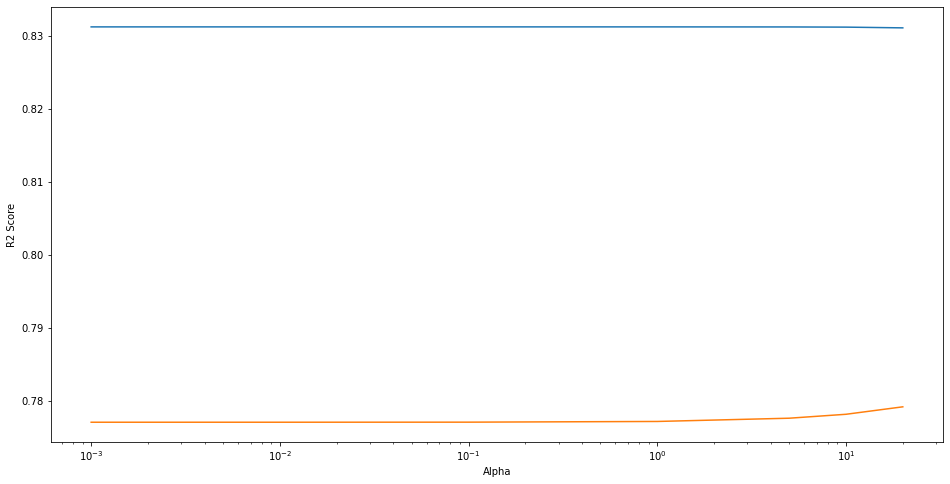

In [51]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [52]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [53]:
# Perform Lasso Regression
lasso = Lasso(alpha=20)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Train data Result for Lasso Regularization:' ,r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test data Result for Lasso Regularization:', r2_score(y_true=y_test,y_pred=y_test_pred))

Train data Result for Lasso Regularization: 0.8288597465797116
Test data Result for Lasso Regularization: 0.6456721533989747


In [54]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [55]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
3,OverallCond,210618.649048
0,MSSubClass,125076.726560
4,YearBuilt,108113.603800
1,LotArea,80595.223603
5,YearRemodAdd,68992.847654
10,TotalBsmtSF,47271.497234
2,OverallQual,46036.520306
8,BsmtFinSF2,44370.299015
7,BsmtFinSF1,40475.426237
6,MasVnrArea,28827.949551


In [56]:
# Use KFold technique to optimize alpha value to get the better result

folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006742,0.003953,0.002207,0.002391,0.001,{'alpha': 0.001},0.806304,0.848817,0.613968,0.831922,...,0.837526,0.828109,0.832293,0.831531,0.830369,0.832938,0.841598,0.822443,0.831197,0.005182
1,0.002039,0.002407,0.003097,0.003725,0.010,{'alpha': 0.01},0.806242,0.848828,0.619806,0.831955,...,0.837522,0.828108,0.832292,0.831530,0.830368,0.832937,0.841598,0.822442,0.831195,0.005182
2,0.003590,0.003893,0.000534,0.001601,0.100,{'alpha': 0.1},0.805635,0.848898,0.669062,0.832253,...,0.837144,0.828016,0.832198,0.831437,0.830276,0.832845,0.841556,0.822346,0.831082,0.005157
3,0.002334,0.004697,0.003036,0.005726,0.200,{'alpha': 0.2},0.804984,0.848909,0.709117,0.832520,...,0.836265,0.827780,0.831955,0.831198,0.830039,0.832608,0.841448,0.822098,0.830797,0.005111
4,0.003237,0.006479,0.001766,0.004973,0.500,{'alpha': 0.5},0.803144,0.848639,0.778568,0.832981,...,0.832655,0.826584,0.830726,0.829991,0.828845,0.831410,0.840902,0.820854,0.829439,0.005044


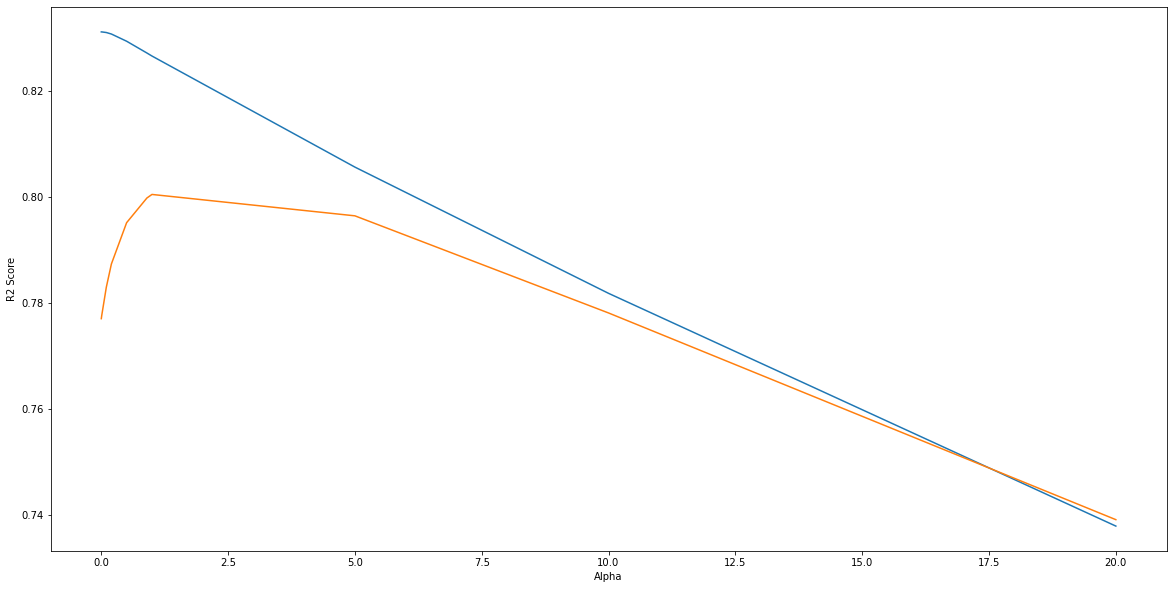

In [58]:
plt.figure(figsize=(20,10))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [59]:
# Checking the best parameter(Alpha value)
model_cv.best_params_


{'alpha': 1.0}

In [60]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print('Train data Result for Ridge Regularization:', r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print('Train data Result for Ridge Regularization:', r2_score(y_test,y_pred_test))

Train data Result for Ridge Regularization: 0.8253152000734241
Train data Result for Ridge Regularization: 0.6596747478194984


In [61]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [62]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
3,OverallCond,191195.312954
0,MSSubClass,127717.038622
4,YearBuilt,101557.487147
1,LotArea,76317.819685
5,YearRemodAdd,72282.368306
10,TotalBsmtSF,47926.281178
2,OverallQual,47086.080668
8,BsmtFinSF2,45878.504663
7,BsmtFinSF1,43203.109077
6,MasVnrArea,29948.339263
